In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Importing necessary libraries

In [2]:
from matplotlib import pyplot as plt 
import os 
import scipy
import IPython
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import tensorflow.keras.layers as tfl
import keras 
import seaborn as sns
from keras.utils import to_categorical
import warnings as w
import sklearn.metrics as Metric_tools
from sklearn.model_selection import train_test_split
import cv2

%load_ext autoreload
%autoreload 2

np.random.seed(100)
w.filterwarnings('ignore')

# Importing data

In [3]:
main_path = r"../input/digit-recognizer"
#print("Files  : \n\t {} ".format(os.listdir(main_path)))
#--------------------------------------------------------------------
train_file = pd.read_csv(os.path.join(main_path, "train.csv"))
test_file  = pd.read_csv(os.path.join(main_path, "test.csv"))

#--------------------------------------------------------------------
print('Unique classes to identify :',train_file['label'].unique())
print('Shape of training file :',train_file.shape)
print('Shape of testing file :',test_file.shape)

#--------------------------------------------------------------------
train_file.head(3)

Unique classes to identify : [1 0 4 7 3 5 8 9 2 6]
Shape of training file : (42000, 785)
Shape of testing file : (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Describing the dataframe

In [4]:
train_file.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Normalizing Train & Test features

In [5]:
train_file_norm = train_file.iloc[:, 1:] / 255.0 #Since 255 is the maximum pixel value (0=black, 255=White)
test_file_norm = test_file / 255.0

In [6]:
train_file_norm.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


### Findings - The values of the pixels have been standardized to the range of [0,1]

# Viewing Training Examples

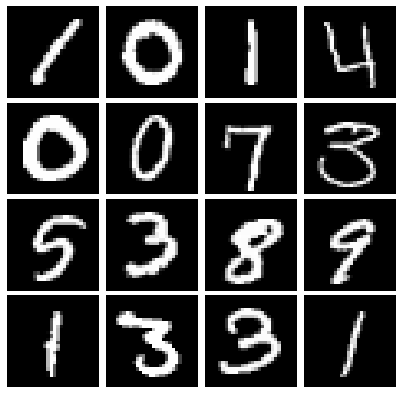

In [7]:
fig, ax_arr = plt.subplots(4, 4, figsize=(7,7)) #Defining plotting space
fig.subplots_adjust(wspace=.05, hspace=.05)

#-----------------------------------------------------------------------------
ax_arr = ax_arr.ravel()
for i, ax in enumerate(ax_arr):
    ax.imshow(train_file_norm.iloc[i, :].values.reshape(28, 28), cmap="gray")
    ax.axis("off")
    
plt.show()    

# Converting the datasets into array format

In [8]:
train_file_norm.head(1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## UDF to restructure dataframe into image pixel format

In [9]:
def picture_reshape(df,num_examples_train,num_examples_test,n_h,n_w,dataset,colour_mode,channel_override):
    
    #Check if the required data is created or not
    try :
        del final_return_arr
    except :
        final_return_arr = np.array([])
        
    #------------------------------------------------------------------------------
    #Condition for channels allocation
    if channel_override==0:
        if colour_mode == 'greyscale':
            n_c = 1
    else:
        n_c = 3
   
    #------------------------------------------------------------------------------
    #Creating the zero dataset for the image 
    train_input_mod = np.zeros((num_examples_train, 32, 32, n_c))
    test_input_mod = np.zeros((num_examples_test, 32, 32, n_c))    
    
    #------------------------------------------------------------------------------
    #For training dataset purpose
    if dataset=='train':

        for i in range(num_examples_train):
            for channel_elem in range(n_c):
                train_input_mod[i,:n_h,:n_w,channel_elem] = train_file_norm.iloc[i, :].values.reshape(n_h,n_w)
        
        final_return_arr = train_input_mod 
        print('Shape of train input :',train_file_norm.shape)
        print('Shape of train output :',final_return_arr.shape)
    
    else: #For test data purpose
        for i in range(num_examples_test):
            for channel_elem in range(n_c):
                test_input_mod[i,:n_h,:n_w,channel_elem] = test_file_norm.iloc[i, : ].values.reshape(n_h,n_w)
                        
        final_return_arr = test_input_mod        
        print('Shape of test input :',test_file_norm.shape)
        print('Shape of test output :',final_return_arr.shape)
    #------------------------------------------------------------------------------
    
    return final_return_arr #Output based on train/test

## Invoking the above UDF for train-test segregation

In [10]:
print('#TRAIN ------------------------------------------------')
train_input_modified = picture_reshape(df=train_file_norm,num_examples_train=train_file_norm.shape[0],num_examples_test=test_file_norm.shape[0],n_h=28,n_w=28,dataset='train',colour_mode='greyscale',channel_override=1)
print(train_input_modified.shape)

print('#TEST ------------------------------------------------')
test_input_modified = picture_reshape(df=test_file_norm,num_examples_train=train_file_norm.shape[0],num_examples_test=test_file_norm.shape[0],n_h=28,n_w=28,dataset='test',colour_mode='greyscale',channel_override=1)
print(test_input_modified.shape)

#TRAIN ------------------------------------------------
Shape of train input : (42000, 784)
Shape of train output : (42000, 32, 32, 3)
(42000, 32, 32, 3)
#TEST ------------------------------------------------
Shape of test input : (28000, 784)
Shape of test output : (28000, 32, 32, 3)
(28000, 32, 32, 3)


### Note - Even though the image is grayscale, we create a 3 channel image array since we intend to use Transfer learning from a pre-trained model which was trained on 3 channel inputs

# Splitting the train dataset into train and dev (80:20 ratio)

In [11]:
train_images_final, dev_images_final, train_labels_final, dev_labels_final = train_test_split(train_input_modified, 
                                                                                              train_file['label'],
                                                                                              test_size=0.2,
                                                                                              train_size=0.8,
                                                                                              shuffle=True,
                                                                                              random_state=100)

#---------------------------------------------------------------------------------------------------------
print('Shape of training images array :',train_images_final.shape)
print('Shape of test images array:',dev_images_final.shape)
print('Shape of training labels array:',train_labels_final.shape)
print('Shape of one image in the training data:',train_images_final[0].shape)

Shape of training images array : (33600, 32, 32, 3)
Shape of test images array: (8400, 32, 32, 3)
Shape of training labels array: (33600,)
Shape of one image in the training data: (32, 32, 3)


# Defining CNN architecture

## Importing ResNet50

In [12]:
pretrained_model = tf.keras.applications.ResNet50(input_shape=train_input_modified[1].shape,
                                               include_top=False,
                                               weights='imagenet')

# freeze the base model by making it non trainable
#pretrained_model.trainable = None 

94773248/94765736 [==============================] - 2s 0us/step


## Creating the model architecture using functional API in Keras (UDF)

In [13]:
def digit_recog_model(input_size):
    
    Input = pretrained_model.layers[-1].output #Creating the input object from the penultimate layer in the pre-trained model
    #-----------------------------------------------------------------------
    x = tfl.Flatten()(Input) #Flattening the CNN output to pass through dense layers later
    
    #-----------------------------------------------------------------------
    x = tfl.Dense(60, activation='relu')(x) #Dense layer with 60 hidden nodes
    x = tfl.Dropout(0.5)(x) #Dropout layer with 50% probability of keeping the nodes intact
    
    #-----------------------------------------------------------------------
#     x = tfl.Dense(20, activation='relu')(x)  #Dense layer with 60 hidden nodes
#     x = tfl.Dropout(0.5)(x)  #Dropout layer with 50% probability of keeping the nodes intact
    
    #-----------------------------------------------------------------------
    outputs = tfl.Dense(10, activation='softmax')(x) #Dense OUTPUT layer with 10 hidden nodes (no of classes)
    
    #-----------------------------------------------------------------------
    #Initiating the model object and providing the input and the output
    model = tf.keras.Model(pretrained_model.inputs, outputs)
    
    return model


#----------------------------------------------------------------------------
# Invoking the model object through the above UDF
model1 = digit_recog_model(train_input_modified[1].shape)

## Detailed Model Summary (including pre-trained model)

In [14]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Specifying the model hyper-parameters

In [15]:
base_learning_rate = 0.0001 #learning rate

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate), #Adam optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #To pass target variable without one-hot encoding
              metrics=['accuracy']) #Metric to evaluate

# Invoking the model fit method to train the CNN architecture

In [16]:
initial_epochs = 15 #no of epochs to train on (Low since we are using pre-trained weights)

history = model1.fit(x=train_images_final, #Training images
                     y=train_labels_final, #Training target labels
                     validation_data=(dev_images_final,dev_labels_final), #Validation data to check on every epoch
                     epochs=initial_epochs,
                     batch_size=128) #Batch-wise optimization

Epoch 1/15
263/263 [==============================] - 68s 240ms/step - loss: 1.5466 - accuracy: 0.5601 - val_loss: 17.2811 - val_accuracy: 0.0795
Epoch 2/15
263/263 [==============================] - 62s 236ms/step - loss: 0.1261 - accuracy: 0.9673 - val_loss: 8.0704 - val_accuracy: 0.1508
Epoch 3/15
263/263 [==============================] - 63s 239ms/step - loss: 0.0629 - accuracy: 0.9836 - val_loss: 3.6186 - val_accuracy: 0.2825
Epoch 4/15
263/263 [==============================] - 63s 241ms/step - loss: 0.0542 - accuracy: 0.9868 - val_loss: 0.4510 - val_accuracy: 0.8881
Epoch 5/15
263/263 [==============================] - 63s 240ms/step - loss: 0.0325 - accuracy: 0.9918 - val_loss: 0.1127 - val_accuracy: 0.9736
Epoch 6/15
263/263 [==============================] - 63s 241ms/step - loss: 0.0317 - accuracy: 0.9928 - val_loss: 0.0662 - val_accuracy: 0.9867
Epoch 7/15
263/263 [==============================] - 64s 243ms/step - loss: 0.0294 - accuracy: 0.9931 - val_loss: 0.0532 - val_a

## Insights- We can see that the model has achieved ~99% accuracy on the train as well as dev data set

# Plotting the loss and accuracy of the model against epochs

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'accuracy')]

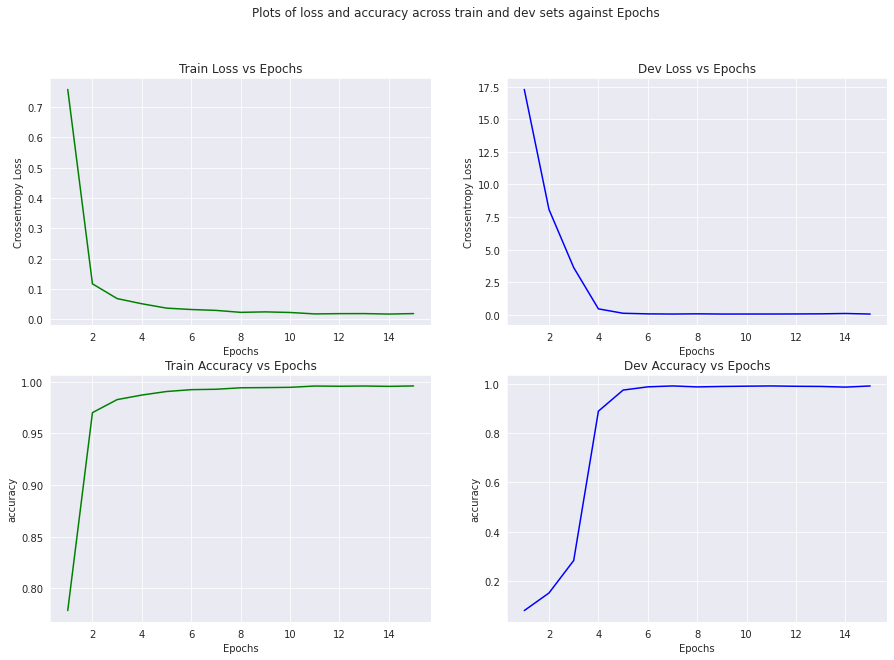

In [17]:
#------------------------------------------------------------------------------------
#history.history
train_loss = history.history['loss']
dev_loss = history.history['val_loss']

train_accu = history.history['accuracy']
dev_accu = history.history['val_accuracy']

#------------------------------------------------------------------------------------

epoch_list = list(range(1,initial_epochs+1))

sns.set_style('darkgrid')
#-------------------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(15,10))

#-------------------------------------------------------------------------------------
fig.suptitle('Plots of loss and accuracy across train and dev sets against Epochs')
axes[0][0].set_title('Train Loss vs Epochs')
axes[0][1].set_title('Dev Loss vs Epochs')
axes[1][0].set_title('Train Accuracy vs Epochs')
axes[1][1].set_title('Dev Accuracy vs Epochs')
#-------------------------------------------------------------------------------------

ax = sns.lineplot(ax=axes[0][0],x=epoch_list,y=train_loss,color='g')
ax.set(xlabel='Epochs',ylabel='Crossentropy Loss')

ax = sns.lineplot(ax=axes[0][1],x=epoch_list,y=dev_loss,color='b')
ax.set(xlabel='Epochs',ylabel='Crossentropy Loss')

ax = sns.lineplot(ax=axes[1][0],x=epoch_list,y=train_accu,color='g')
ax.set(xlabel='Epochs',ylabel='accuracy')

ax = sns.lineplot(ax=axes[1][1],x=epoch_list,y=dev_accu,color='b')
ax.set(xlabel='Epochs',ylabel='accuracy')


# Model prediction on the test data

In [18]:
submission_ = model1.predict(test_input_modified)
#-----------------------------------------------------
print('Shape of predicted labels :',submission_.shape)
print(submission_[0:5])

#-----------------------------------------------------
submission_decision = np.argmax(submission_,axis=1)
submission_decision[0:5]

Shape of predicted labels : (28000, 10)
[[5.8875630e-23 2.4391778e-18 1.0000000e+00 3.6996509e-16 2.1546936e-19
  1.1383321e-19 8.8521402e-17 9.0061420e-22 4.8001503e-19 4.1175580e-15]
 [1.0000000e+00 3.5043290e-20 4.4715158e-28 1.0169150e-22 3.0448244e-19
  5.6203801e-21 3.0809878e-18 5.4369486e-23 2.1010089e-20 4.8285356e-22]
 [7.7760041e-11 1.5151340e-12 4.2166390e-09 7.0082919e-11 5.1024475e-08
  2.9288305e-09 1.5976481e-11 3.5757153e-09 1.1197520e-08 9.9999988e-01]
 [8.2787287e-01 5.4647867e-03 4.0602349e-03 8.1150420e-03 1.3104753e-02
  4.8408378e-02 9.8304823e-03 2.4106929e-02 5.9971968e-03 5.3039305e-02]
 [1.1428988e-15 1.6666993e-15 2.3853417e-12 1.0000000e+00 6.3886429e-13
  9.2896464e-16 6.2445074e-13 1.2514981e-17 1.7599103e-13 3.6352543e-13]]


array([2, 0, 9, 0, 3])

# Saving for submission

In [19]:
submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
submission['Label'] = submission_decision

#----------------------------------------------------------------------------
submission.to_csv('submission.csv', index=False)


submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
